# **• Parte 1: Selección y Análisis de la Base de Datos**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io

In [159]:
url = "https://raw.githubusercontent.com/DawnHarper/TP_FINAL_MATE_III/main/Covid%20Dataset.csv"
df = pd.read_csv(url)

In [160]:
df.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,...,No,Yes,Yes,No,No,Yes,No,No,No,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,...,Yes,No,No,No,No,Yes,No,No,No,Yes


In [161]:
df.tail(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
5424,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5425,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5426,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5427,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5428,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5433,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,No


In [162]:
print(df.columns)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [163]:
breathProb_rep ={
    "Yes" : 0,
    "No" : 1
}
fever_rep ={
    "Yes" : 0,
    "No" : 1
}
cough_rep ={
    "Yes" : 0,
    "No" : 1
}
sore_rep ={
    "Yes" : 0,
    "No" : 1
}
runningNose_rep ={
    "Yes" : 0,
    "No" : 1
}
asthma_rep ={
    "Yes" : 0,
    "No" : 1
}
lungDis_rep ={
    "Yes" : 0,
    "No" : 1
}
headache_rep ={
    "Yes" : 0,
    "No" : 1
}
heartDis_rep ={
    "Yes" : 0,
    "No" : 1
}
diabetes_rep ={
    "Yes" : 0,
    "No" : 1
}
tension_rep ={
    "Yes" : 0,
    "No" : 1
}
fatigue_rep ={
    "Yes" : 0,
    "No" : 1
}
gastro_rep ={
    "Yes" : 0,
    "No" : 1
}
travel_rep ={
    "Yes" : 0,
    "No" : 1
}
contact_rep ={
    "Yes" : 0,
    "No" : 1
}
attend_rep ={
    "Yes" : 0,
    "No" : 1
}
exposedPlaces_rep ={
    "Yes" : 0,
    "No" : 1
}
FamilyExposed_rep ={
    "Yes" : 0,
    "No" : 1
}
mask_rep ={
    "Yes" : 0,
    "No" : 1
}
sanit_rep ={
    "Yes" : 0,
    "No" : 1
}
covid_rep ={
    "Yes" : 0,
    "No" : 1
}

In [164]:
rep_d = {
    "Breathing Problem": breathProb_rep,
    "Fever": fever_rep,
    "Dry Cough": cough_rep,
    "Sore throat": sore_rep,
    "Running Nose": runningNose_rep,
    "Asthma": asthma_rep,
    "Chronic Lung Disease": lungDis_rep,
    "Headache": headache_rep,
    "Heart Disease": heartDis_rep,
    "Diabetes": diabetes_rep,
    "Hyper Tension": tension_rep,
    "Fatigue ": fatigue_rep,
    "Gastrointestinal ": gastro_rep,
    "Abroad travel": travel_rep,
    "Contact with COVID Patient": contact_rep,
    "Attended Large Gathering": attend_rep,
    "Visited Public Exposed Places": exposedPlaces_rep,
    "Family working in Public Exposed Places": FamilyExposed_rep,
    "Wearing Masks": mask_rep,
    "Sanitization from Market": sanit_rep,
    "COVID-19": covid_rep
}

In [165]:
# Reemplaza los valores
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
print("\nDataFrame despues de reemplazos:")
df.head()


DataFrame despues de reemplazos:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,0,0,0,0,0,1,1,1,1,0,...,0,0,1,0,1,0,0,1,1,0
1,0,0,0,0,1,0,0,0,1,1,...,0,1,1,1,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,1,1,1,0
3,0,0,0,1,1,0,1,1,0,0,...,1,1,0,1,0,0,1,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0


In [166]:
df["Wearing Masks"] = pd.to_numeric(df["Wearing Masks"], errors="coerce")
df["Sanitization from Market"] = pd.to_numeric(df["Sanitization from Market"], errors="coerce")

array([[<Axes: title={'center': 'Breathing Problem'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Sore throat'}>,
        <Axes: title={'center': 'Running Nose'}>],
       [<Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'Chronic Lung Disease'}>,
        <Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Heart Disease'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Hyper Tension'}>,
        <Axes: title={'center': 'Fatigue '}>,
        <Axes: title={'center': 'Gastrointestinal '}>,
        <Axes: title={'center': 'Abroad travel'}>,
        <Axes: title={'center': 'Contact with COVID Patient'}>],
       [<Axes: title={'center': 'Attended Large Gathering'}>,
        <Axes: title={'center': 'Visited Public Exposed Places'}>,
        <Axes: title={'center': 'Family working in Public Exposed Places'}>,
        <Axes: title={'center': 'We

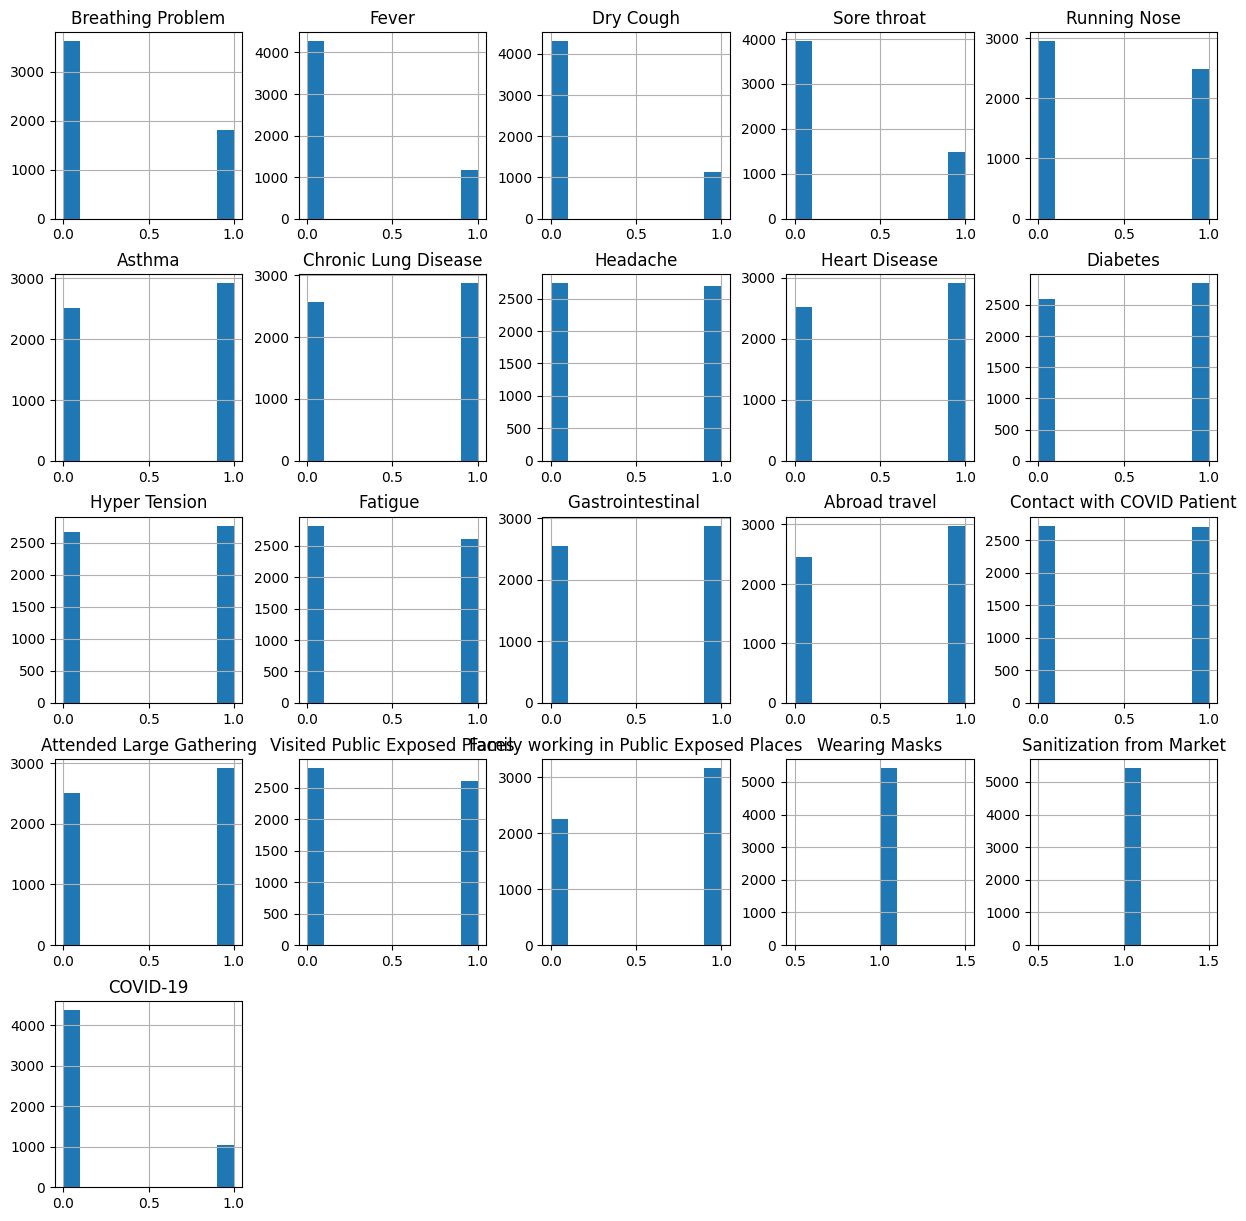

In [167]:
df.hist(figsize=(15, 15))

In [168]:
# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:", num_outliers)

Filas con Valores Atípicos: 2113


In [169]:
# Normaliza
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Normalización
print("\nDataFrame normalizado:")
df_n.describe()


DataFrame normalizado:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5434.000000,5434.000000,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,...,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,5.434000e+03,0.0,0.0,5.434000e+03
mean,2.092139e-16,4.184278e-17,4.184278e-17,-8.368556e-17,0.000000,0.000000,-6.276417e-17,9.414626e-17,-5.230348e-18,-3.007450e-17,...,-3.922761e-17,6.930211e-17,-6.276417e-17,1.255283e-16,6.276417e-17,-6.276417e-17,-1.046070e-16,NaN,NaN,-8.368556e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00
min,-7.078225e-01,-5.212064e-01,-5.114869e-01,-6.120320e-01,-0.916859,-1.077628,-1.057503e+00,-9.929399e-01,-1.074045e+00,-1.048565e+00,...,-9.623392e-01,-1.062985e+00,-1.103100e+00,-9.966013e-01,-1.079225e+00,-9.626940e-01,-1.184078e+00,NaN,NaN,-4.896386e-01
25%,-7.078225e-01,-5.212064e-01,-5.114869e-01,-6.120320e-01,-0.916859,-1.077628,-1.057503e+00,-9.929399e-01,-1.074045e+00,-1.048565e+00,...,-9.623392e-01,-1.062985e+00,-1.103100e+00,-9.966013e-01,-1.079225e+00,-9.626940e-01,-1.184078e+00,NaN,NaN,-4.896386e-01
50%,-7.078225e-01,-5.212064e-01,-5.114869e-01,-6.120320e-01,-0.916859,0.927793,9.454497e-01,-9.929399e-01,9.308883e-01,9.535088e-01,...,-9.623392e-01,9.405739e-01,9.063690e-01,-9.966013e-01,9.264206e-01,-9.626940e-01,8.443835e-01,NaN,NaN,-4.896386e-01
75%,1.412523e+00,-5.212064e-01,-5.114869e-01,1.633601e+00,1.090479,0.927793,9.454497e-01,1.006925e+00,9.308883e-01,9.535088e-01,...,1.038943e+00,9.405739e-01,9.063690e-01,1.003226e+00,9.264206e-01,1.038560e+00,8.443835e-01,NaN,NaN,-4.896386e-01
max,1.412523e+00,1.918273e+00,1.954724e+00,1.633601e+00,1.090479,0.927793,9.454497e-01,1.006925e+00,9.308883e-01,9.535088e-01,...,1.038943e+00,9.405739e-01,9.063690e-01,1.003226e+00,9.264206e-01,1.038560e+00,8.443835e-01,NaN,NaN,2.041947e+00


In [170]:
# Calcula y muestra la matriz de correlacion
corr_matrix = df_n.corr()
print("\nMatriz de correlacion:")
df_n.corr()


Matriz de correlacion:


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


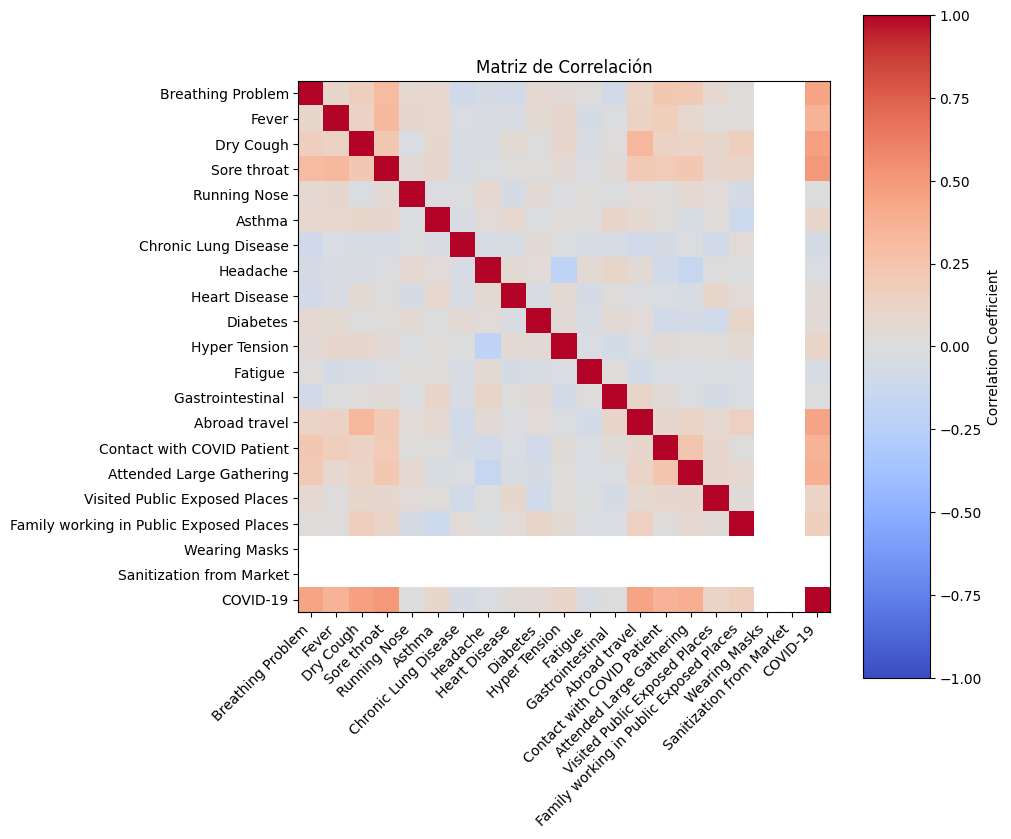

In [171]:
# Visualiza la matriz de correlacion
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlacion
cax = ax.imshow(corr_matrix.to_numpy(), cmap='coolwarm', vmin=-1, vmax=1)

# Ajusta
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# Añade una barra de color
cbar = fig.colorbar(cax, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Correlation Coefficient')

# Añade título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
plt.tight_layout()

plt.show()

In [172]:
# Definir características y etiquetas que me interesan
features = ["Breathing Problem","Fever","Dry Cough","Sore throat","Running Nose","Headache","Fatigue " ,
            "Gastrointestinal " ,"Abroad travel","Contact with COVID Patient"]  # Seleccionar las características relevantes

#Estandarizo las etiquetas dividiendo cada columna de estas por el maximo de esa columna para que sean datos entre 0 y 1
df[features] = df[features] / df[features].max()

In [173]:
df[df["COVID-19"]==0].head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,0.0,0.0,0.0,0.0,0.0,1,1,1.0,1,0,...,0.0,0.0,1.0,0.0,1,0,0,1,1,0
1,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1,...,0.0,1.0,1.0,1.0,0,0,1,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,0,...,0.0,0.0,0.0,1.0,1,1,1,1,1,0
3,0.0,0.0,0.0,1.0,1.0,0,1,1.0,0,0,...,1.0,1.0,0.0,1.0,0,0,1,1,1,0
4,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0,0,...,1.0,0.0,1.0,0.0,1,0,1,1,1,0
5,0.0,0.0,0.0,1.0,1.0,1,1,1.0,0,1,...,1.0,1.0,1.0,1.0,1,1,1,1,1,0
6,0.0,0.0,0.0,1.0,1.0,1,0,1.0,0,0,...,0.0,0.0,1.0,1.0,0,0,0,1,1,0
7,0.0,0.0,0.0,1.0,0.0,0,1,1.0,1,0,...,1.0,0.0,0.0,1.0,1,0,1,1,1,0
8,0.0,0.0,0.0,1.0,0.0,1,0,1.0,1,0,...,0.0,1.0,0.0,0.0,0,1,1,1,1,0
9,0.0,0.0,0.0,1.0,1.0,0,1,1.0,1,0,...,0.0,1.0,1.0,1.0,1,0,1,1,1,0


In [174]:
df[df["COVID-19"]==1].head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
4075,1.0,1.0,1.0,1.0,0.0,1,1,0.0,1,1,...,0.0,1.0,1.0,1.0,0,0,0,1,1,1
4076,1.0,1.0,1.0,1.0,0.0,1,0,1.0,1,1,...,0.0,1.0,1.0,0.0,0,0,0,1,1,1
4077,1.0,1.0,1.0,1.0,0.0,1,1,0.0,0,1,...,0.0,1.0,1.0,1.0,1,0,0,1,1,1
4078,1.0,1.0,1.0,1.0,0.0,0,1,0.0,0,0,...,1.0,1.0,1.0,1.0,0,1,1,1,1,1
4079,1.0,1.0,1.0,1.0,0.0,1,1,0.0,0,0,...,0.0,0.0,1.0,1.0,1,1,0,1,1,1
4080,1.0,1.0,1.0,1.0,0.0,1,0,1.0,0,0,...,1.0,0.0,1.0,0.0,1,1,0,1,1,1
4081,1.0,1.0,1.0,1.0,0.0,0,1,0.0,1,0,...,0.0,0.0,1.0,1.0,1,0,1,1,1,1
4082,1.0,1.0,1.0,1.0,0.0,0,0,0.0,1,1,...,1.0,1.0,1.0,0.0,0,0,1,1,1,1
4083,1.0,1.0,1.0,1.0,1.0,1,1,0.0,0,1,...,1.0,1.0,1.0,1.0,1,0,0,1,1,1
4084,1.0,1.0,1.0,1.0,0.0,1,0,0.0,1,0,...,0.0,0.0,1.0,1.0,0,1,0,1,1,1


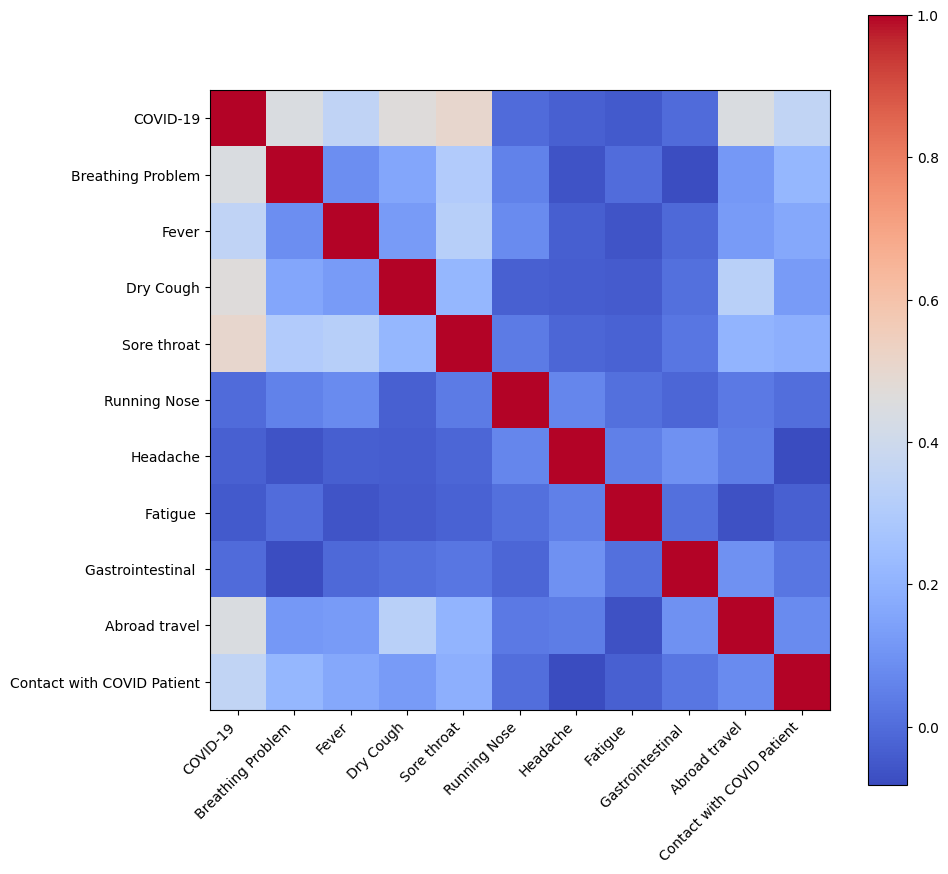

In [175]:
# Agrega la columna objetivo 'COVID-19' a la lista de características
labels = df.loc[:, ["COVID-19"] + features].columns.to_list()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Muestra la matriz de correlación con el tema 'coolwarm'
cax = ax.imshow(df.loc[:, ["COVID-19"] + features].corr().to_numpy(), cmap='coolwarm')

# Establece las etiquetas de los ejes
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(labels, ha='right')

# Agrega una barra de color para mostrar la escala de correlación
fig.colorbar(cax)

plt.show()

# **• Parte 2: Desarrollo de la Red Neuronal**

In [176]:
X = df[features].values
Y = df['COVID-19'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

In [177]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(6)

# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(5, 10)
w_output = np.random.rand(1, 5)

b_hidden = np.random.rand(5, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))
# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

print(b_hidden)
print(b_output)
print(w_hidden)
print(w_output)

# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    print(f'{Z1=}')
    A1 = relu(Z1)
    print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

4075
[[0.73473504]
 [0.18910712]
 [0.33110407]
 [0.84422842]
 [0.61502403]]
[[0.88526408]]
[[0.89286015 0.33197981 0.82122912 0.04169663 0.10765668 0.59505206
  0.52981736 0.41880743 0.33540785 0.62251943]
 [0.43814143 0.73588211 0.51803641 0.5788586  0.6453551  0.99022427
  0.8198582  0.41320093 0.87626766 0.82375943]
 [0.05447451 0.71863724 0.80217056 0.73640664 0.70913175 0.54093685
  0.12482417 0.9576473  0.4032563  0.21695116]
 [0.71727585 0.99420744 0.25561406 0.67130943 0.59900591 0.71733215
  0.93734953 0.35180977 0.2536341  0.40247251]
 [0.74651072 0.72407057 0.4061078  0.98937985 0.45049928 0.37380843
  0.70962861 0.08245855 0.39837292 0.77088097]]
[[0.76475098 0.28385938 0.18954219 0.47125096 0.33480604]]


In [178]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

Z1=array([[3.54270555, 1.43744379, 3.61433658, ..., 1.43744379, 3.78042803,
        1.89137202],
       [4.45204968, 1.82468648, 4.3721547 , ..., 1.82468648, 4.16005275,
        1.58341118],
       [3.86907101, 1.58117268, 3.12137496, ..., 1.58117268, 3.26300048,
        1.53653094],
       [3.95897394, 2.16056648, 4.42063573, ..., 2.16056648, 4.1387418 ,
        1.35347657],
       [3.03589962, 1.43933175, 3.37630254, ..., 1.43933175, 4.65034685,
        1.41950475]])
A1=array([[3.54270555, 1.43744379, 3.61433658, ..., 1.43744379, 3.78042803,
        1.89137202],
       [4.45204968, 1.82468648, 4.3721547 , ..., 1.82468648, 4.16005275,
        1.58341118],
       [3.86907101, 1.58117268, 3.12137496, ..., 1.58117268, 3.26300048,
        1.53653094],
       [3.95897394, 2.16056648, 4.42063573, ..., 2.16056648, 4.1387418 ,
        1.35347657],
       [3.03589962, 1.43933175, 3.37630254, ..., 1.43933175, 4.65034685,
        1.41950475]])
Z2=array([[8.47376774, 4.30226995, 8.69567627, ..., 

In [179]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 19.57%


In [180]:
L = 0.05  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(20_000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

Se han truncado las últimas 5000 líneas del flujo de salida.
A1=array([[4.92858701],
       [3.92263386],
       [4.22541026],
       [4.79549842],
       [4.32617769]])
Z2=array([[-28.7282225]])
Z1=array([[3.61211561],
       [4.14134807],
       [4.50466973],
       [4.84257102],
       [4.78293042]])
A1=array([[3.61211561],
       [4.14134807],
       [4.50466973],
       [4.84257102],
       [4.78293042]])
Z2=array([[-29.04090202]])
Z1=array([[5.29904763],
       [5.97072466],
       [5.5766232 ],
       [6.36270483],
       [5.14439796]])
A1=array([[5.29904763],
       [5.97072466],
       [5.5766232 ],
       [6.36270483],
       [5.14439796]])
Z2=array([[-38.15224631]])
Z1=array([[1.74395288],
       [2.12432869],
       [1.90961591],
       [2.20881958],
       [1.50763874]])
A1=array([[1.74395288],
       [2.12432869],
       [1.90961591],
       [2.20881958],
       [1.50763874]])
Z2=array([[-10.14765305]])
Z1=array([[5.23784673],
       [5.62508943],
       [5.38157563],
   

In [181]:
test_predictions = forward_prop(X_test.T)[3]  # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= 0.5).astype(int).flatten(), Y_test)
accuracy = np.mean(test_comparisons)

Z1=array([[ 2.78090771,  5.30057333,  2.48461594, ...,  5.30057333,
        -2.88147132,  3.37812985],
       [ 3.69025184,  5.68781603,  3.24243405, ...,  5.68781603,
        -2.5018466 ,  3.07016902],
       [ 3.10727317,  5.44430222,  1.99165431, ...,  5.44430222,
        -3.39889886,  3.02328877],
       [ 3.1971761 ,  6.02369602,  3.29091508, ...,  6.02369602,
        -2.52315755,  2.84023441],
       [ 2.27410178,  5.30246129,  2.2465819 , ...,  5.30246129,
        -2.0115525 ,  2.90626259]])
A1=array([[2.78090771, 5.30057333, 2.48461594, ..., 5.30057333, 0.        ,
        3.37812985],
       [3.69025184, 5.68781603, 3.24243405, ..., 5.68781603, 0.        ,
        3.07016902],
       [3.10727317, 5.44430222, 1.99165431, ..., 5.44430222, 0.        ,
        3.02328877],
       [3.1971761 , 6.02369602, 3.29091508, ..., 6.02369602, 0.        ,
        2.84023441],
       [2.27410178, 5.30246129, 2.2465819 , ..., 5.30246129, 0.        ,
        2.90626259]])
Z2=array([[-17.9742954

In [182]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.17%
